# Neural Computing - Individual Coursework

In [5]:
#some basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,classification_report, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [6]:
#Load Data

data = pd.read_excel('default of credit card clients.xlsx')
df_data = pd.DataFrame(data)
df_data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [7]:
#rephrasing the header. 
new_headers = df_data.iloc[0]
df_data.columns = new_headers
df_data = df_data.drop(0)
df_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
#since all the columns are already encoded with a numerical value, we don't do a lable encoding. 
df_data = df_data.astype(int)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int32
 1   LIMIT_BAL                   30000 non-null  int32
 2   SEX                         30000 non-null  int32
 3   EDUCATION                   30000 non-null  int32
 4   MARRIAGE                    30000 non-null  int32
 5   AGE                         30000 non-null  int32
 6   PAY_0                       30000 non-null  int32
 7   PAY_2                       30000 non-null  int32
 8   PAY_3                       30000 non-null  int32
 9   PAY_4                       30000 non-null  int32
 10  PAY_5                       30000 non-null  int32
 11  PAY_6                       30000 non-null  int32
 12  BILL_AMT1                   30000 non-null  int32
 13  BILL_AMT2                   30000 non-null  int32
 14  BILL_A

In [9]:
#studying the features - unique values of each feature
df_data.nunique()

0
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
#checking the categorical features
print(df_data['SEX'].unique())
print(df_data['EDUCATION'].unique())
print(df_data['MARRIAGE'].unique())

#The '0' in the EDUCATION and MARRIAGE seems to be a missing value filled with '0'.
#and in EDUCATION 5 and 6 are not described in the data description.

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [11]:
#missing values
df_data.loc[(df_data['EDUCATION'] == 0) | (df_data['MARRIAGE'] == 0)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
219,219,110000,2,3,0,31,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
810,810,160000,2,2,0,37,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
821,821,200000,2,3,0,51,-1,-1,-1,-1,...,780,390,390,0,390,780,0,390,390,0
1020,1020,180000,2,3,0,45,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1444,1444,200000,1,3,0,51,-1,-1,-1,-1,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28603,28603,200000,2,3,0,37,1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28604,28604,110000,2,3,0,44,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28767,28767,80000,2,3,0,40,2,2,3,2,...,1375,779,5889,5000,0,0,885,5889,4239,0
29079,29079,100000,2,3,0,56,1,2,0,0,...,31134,30444,32460,0,1500,2700,0,2400,0,0


In [12]:
#just checking the EDUCATION category 5 and 6.
df_data.loc[(df_data['EDUCATION'] == 5) | (df_data['EDUCATION'] == 6)]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
48,48,150000,2,5,2,46,0,0,-1,0,...,1170,0,0,1013,1170,0,0,0,0,1
70,70,20000,1,5,2,22,2,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
386,386,410000,2,5,1,42,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
503,503,230000,2,6,2,46,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
505,505,30000,1,6,1,53,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,29812,50000,1,5,2,46,0,0,0,-1,...,19183,19563,19157,1423,1000,19183,687,696,776,0
29837,29837,180000,1,6,1,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29840,29840,150000,1,5,1,36,0,0,0,0,...,136378,139219,142172,5500,3800,3900,4000,4100,4100,0
29921,29921,50000,1,5,1,45,2,0,0,0,...,50947,51020,0,3000,3428,2002,1023,0,0,1


In [13]:
#Assumimng that the zeros are filled in place of NA and removing those.
df_data_cl = df_data.loc[(df_data['EDUCATION'] != 0) & (df_data['MARRIAGE'] != 0)]
df_data_cl


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
#Correlation Analysis to analyse the highly correlated features with the class attribute

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,,,,,,,,,,,,,,,,,,,,,
ID,1.000000,0.026131,0.018311,0.039410,-0.028700,0.018774,-0.030402,-0.011047,-0.018705,-0.002756,...,0.040586,0.016867,0.016861,0.010069,0.008564,0.039224,0.007770,0.000599,0.003067,-0.014133
LIMIT_BAL,0.026131,1.000000,0.024953,-0.218676,-0.110683,0.144802,-0.271175,-0.296197,-0.285901,-0.267423,...,0.294143,0.295752,0.290608,0.195311,0.178245,0.210059,0.203216,0.217263,0.219702,-0.153718
SEX,0.018311,0.024953,1.000000,0.013381,-0.030077,-0.091190,-0.057529,-0.070810,-0.066400,-0.060520,...,-0.021809,-0.016998,-0.016760,-0.000172,-0.001268,-0.008386,-0.002176,-0.001666,-0.002610,-0.039843
EDUCATION,0.039410,-0.218676,0.013381,1.000000,-0.138646,0.175544,0.105372,0.121256,0.113609,0.108750,...,-0.000159,-0.007330,-0.008876,-0.038009,-0.029446,-0.039589,-0.038013,-0.040263,-0.037159,0.028118
MARRIAGE,-0.028700,-0.110683,-0.030077,-0.138646,1.000000,-0.416691,0.019278,0.024165,0.032862,0.032740,...,-0.025481,-0.027528,-0.023282,-0.005393,-0.009009,-0.003941,-0.013480,-0.002149,-0.007571,-0.026154


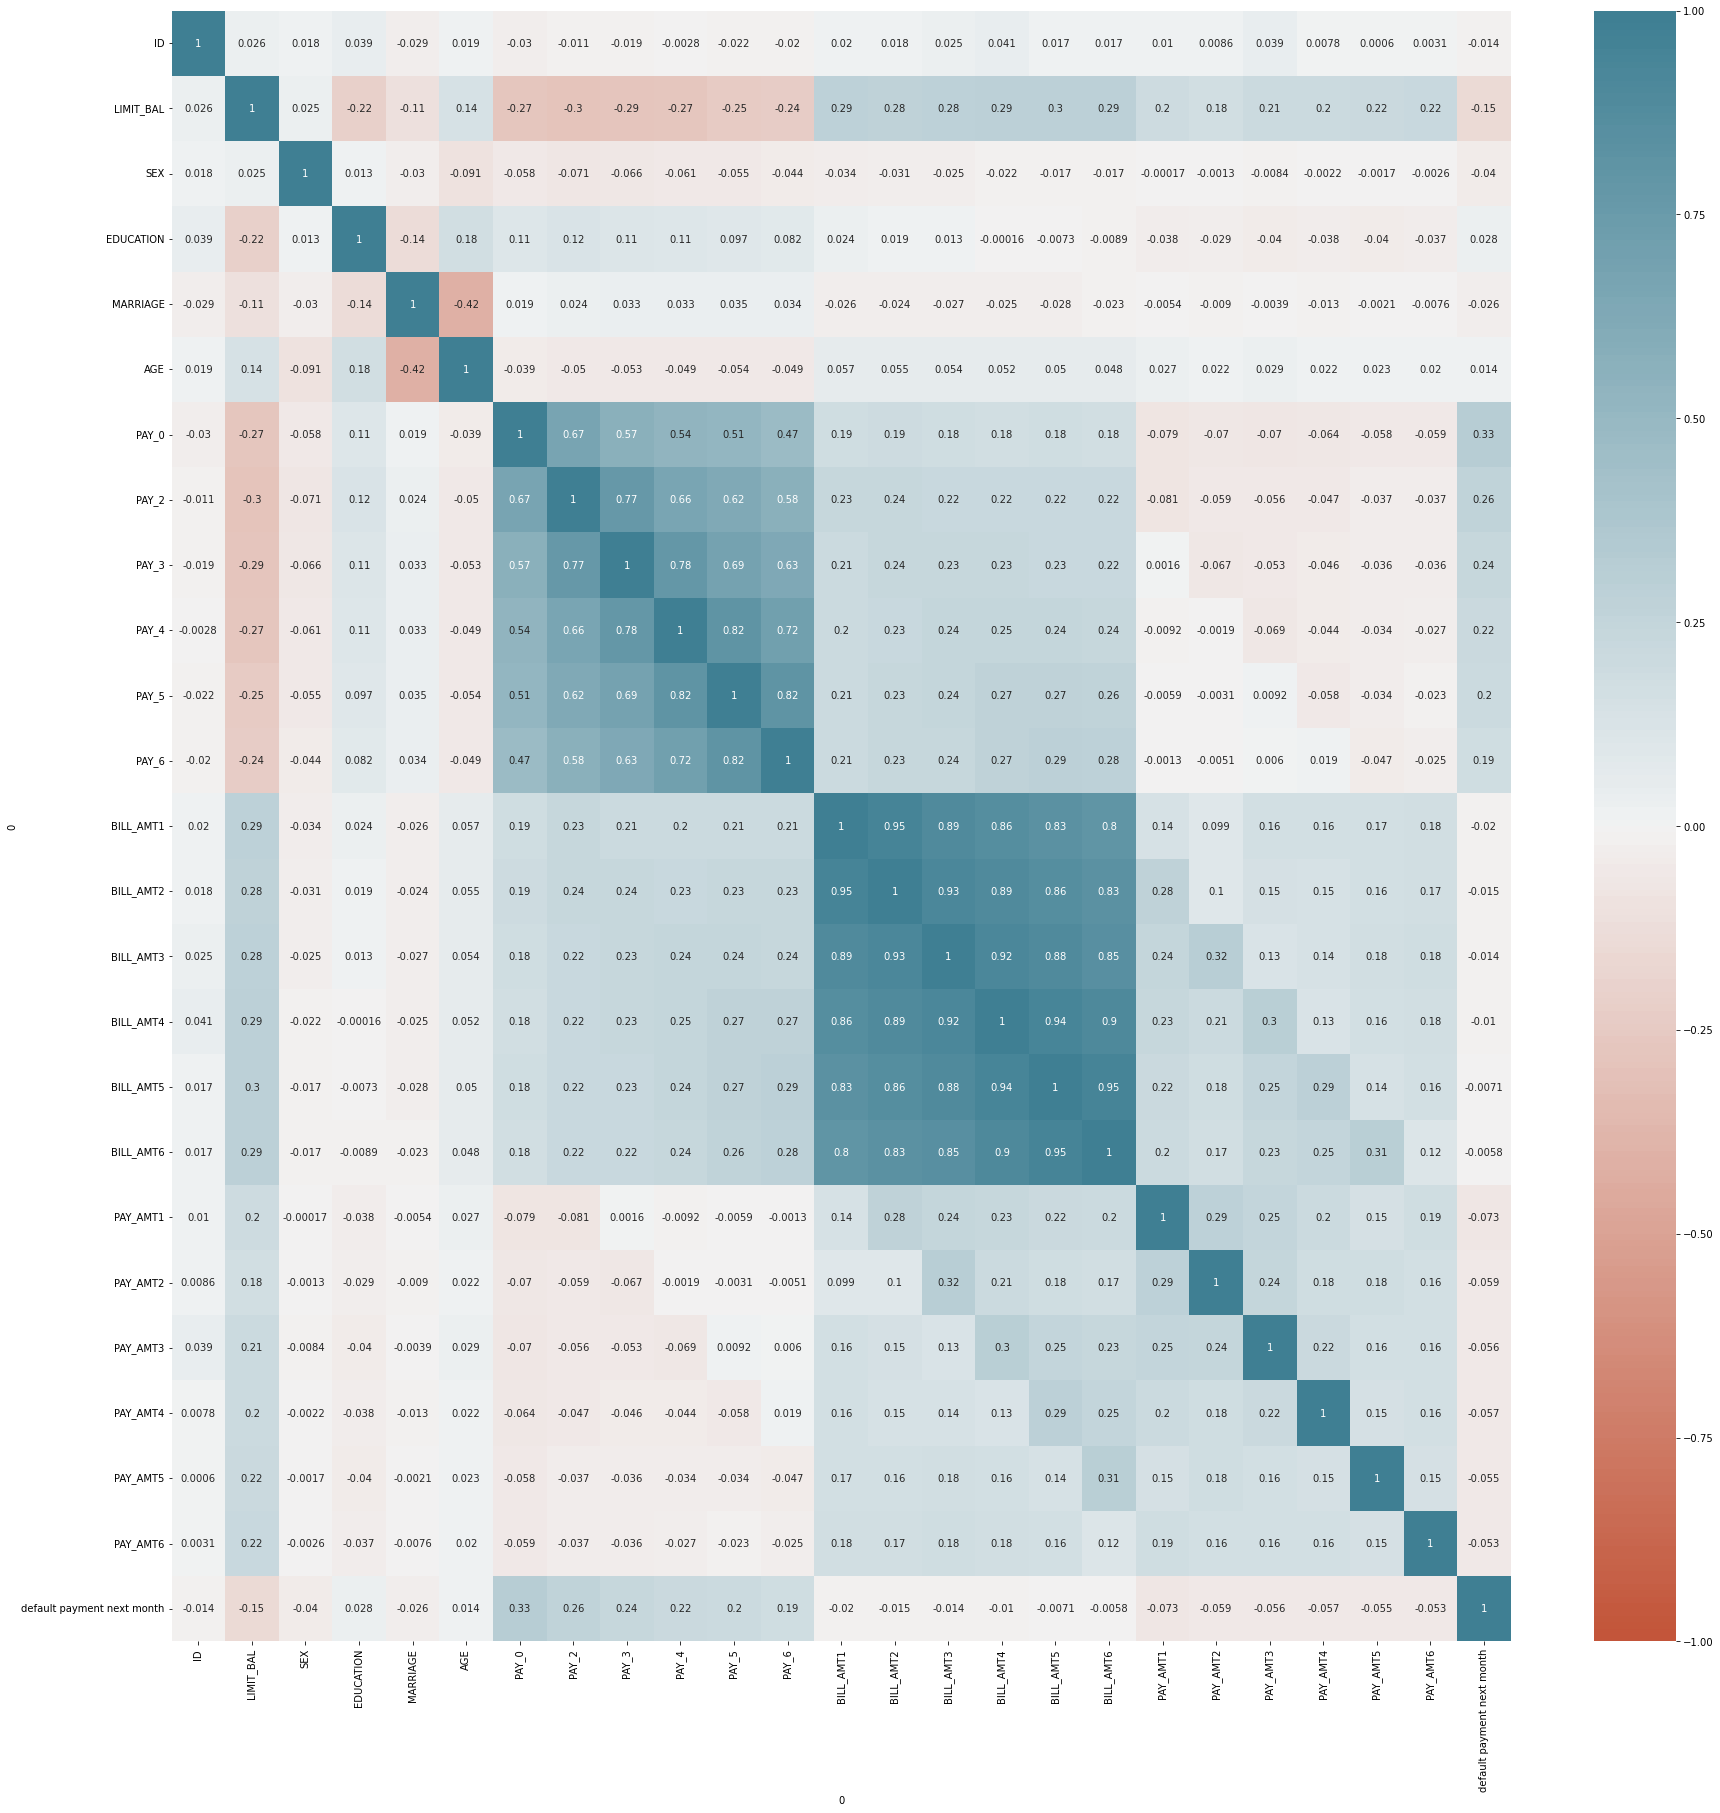

In [15]:
# create a correlation matrix
corr = df_data_cl.corr()

# plot it in seaborn heatmap
import seaborn as sns

plt.figure(figsize = (30,30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
                 cmap=sns.diverging_palette(20, 220, n=200), 
                 square=False,
                annot=True)
corr.head()

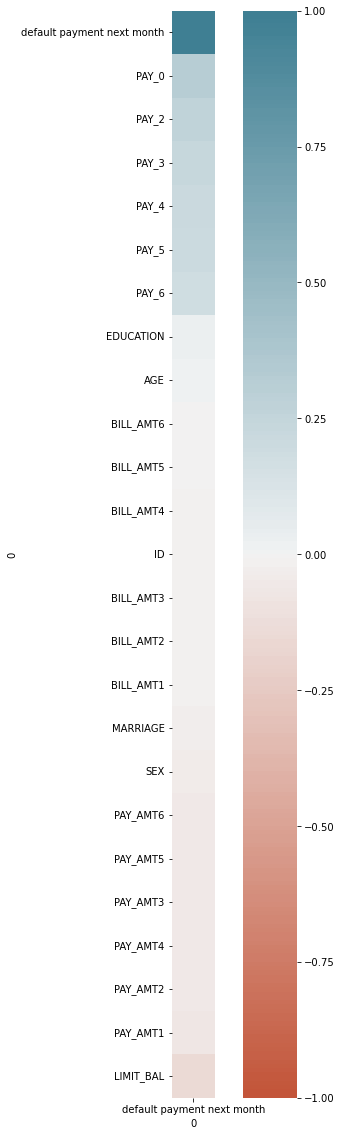

In [16]:
corr_default_payment_next_month = corr[['default payment next month']]

corr_default_payment_next_month = corr_default_payment_next_month.sort_values(by='default payment next month', ascending = False)

plt.figure(figsize = (10,20))
ax = sns.heatmap (corr_default_payment_next_month, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20,220, n=200),
                 square=True)

(array([23301.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6631.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

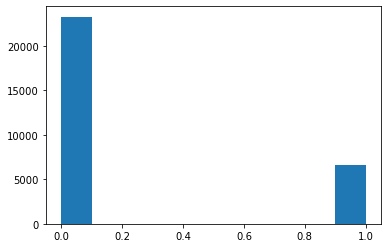

In [17]:
#Preparing dataset for models
#check the target class distribution

plt.hist(df_data_cl["default payment next month"])


Use this 'df_data_cl' dataframe lable encoded dataset.

In [18]:
#One Hot Encoding
df_cl_ohe = pd.get_dummies(df_data_cl, columns=['SEX', 
                                    'MARRIAGE', 
                                    'EDUCATION', 
                                    'PAY_0',
                                    'PAY_2',
                                    'PAY_3',
                                    'PAY_4',
                                    'PAY_5',
                                    'PAY_6'])
df_cl_ohe.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
1,1,20000,24,3913,3102,689,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
3,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,0,1,0,0,0,0,0,0,0
4,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,0,1,0,0,0,0,0,0,0
5,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,0,1,0,0,0,0,0,0,0


In [19]:
#Can do downsampling (this looses some info from the data) or upsampling (this is better)

# SVM

In [22]:
#split data
#split dependant and independant variables 
x5 = df_cl_ohe.drop('default payment next month', axis=1)
y5 = df_cl_ohe['default payment next month']

#split train and test 
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5, test_size=0.25, stratify=y5, random_state=42)

#Handling the imbalanced dataset using SMOTE. 
smote5 = SMOTE()
x_train_smt5, y_train_smt5 = smote5.fit_resample(x_train5, y_train5)
df_cl_ohe.columns
x_test5

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
7967,7967,150000,24,0,10437,4044,594,0,0,10437,...,1,0,0,0,0,0,0,0,0,0
18732,18732,80000,23,80457,82885,80495,78027,30052,30373,4350,...,0,0,1,0,0,0,0,0,0,0
5429,5429,100000,42,17565,19700,18306,18239,17053,16753,3183,...,0,0,1,0,0,0,0,0,0,0
18830,18830,340000,29,11806,13535,18784,26069,20007,15857,10000,...,0,0,1,0,0,0,0,0,0,0
26094,26094,240000,43,7994,20487,27770,22920,4779,7640,20487,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22422,22422,20000,34,17970,17389,20491,19803,19734,19613,0,...,0,0,1,0,0,0,0,0,0,0
8581,8581,230000,32,195409,203432,180786,95445,63048,99961,21844,...,0,0,1,0,0,0,0,0,0,0
8083,8083,50000,65,11763,11283,13288,12780,13522,13155,0,...,0,0,0,1,0,0,0,0,0,0
25031,25031,490000,57,59056,60236,62268,63264,62928,66334,2153,...,0,0,1,0,0,0,0,0,0,0


In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling X_train
x_train_smt5_sc = x_train_smt5.drop(['SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8'], axis=1)

x_train_smt5_sc1 = scaler.fit_transform(x_train_smt5_sc)
x_train_smt5_sc1_df = pd.DataFrame(x_train_smt5_sc1)
x_train_smt5_sc1_df.columns = x_train_smt5_sc.columns
x_train_smt5_sc1_df

x_train_smt5_scaled = pd.concat([x_train_smt5_sc1_df, x_train_smt5[['SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0',
       'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5', 'PAY_0_6',
       'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7',
       'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-2',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7',
       'PAY_6_8']]], axis=1)
x_train_smt5_scaled


# scaling x_test 
scaler2 = StandardScaler()

x_test5_sc = x_test5.drop(['SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8'], axis=1)

x_test5_sc1 = scaler2.fit_transform(x_test5_sc)
x_test5_sc1_df = pd.DataFrame(x_test5_sc1)
x_test5_sc1_df.columns = x_test5_sc.columns
x_test5_reset_index = x_test5[['SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'PAY_0_-2', 'PAY_0_-1',
       'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4', 'PAY_0_5',
       'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4',
       'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6',
       'PAY_6_7', 'PAY_6_8']].reset_index()
x_test5_reset_index

x_test5_scaled = pd.concat([x_test5_sc1_df, x_test5_reset_index], axis=1)
x_test5_scaled.drop('index', axis=1, inplace=True)

x_train_smt5_scaled
x_test5_scaled


,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-0.816752,-0.140548,-1.246446,-0.691909,-0.541088,-0.618797,-0.657521,-0.656810,-0.643255,0.315542,...,1,0,0,0,0,0,0,0,0,0
1,0.418195,-0.680976,-1.353351,0.398806,0.474419,0.483491,0.531142,-0.167821,-0.139796,-0.073698,...,0,0,1,0,0,0,0,0,0,0
2,-1.107909,-0.526568,0.677847,-0.453789,-0.411248,-0.413164,-0.386655,-0.379333,-0.365559,-0.148323,...,0,0,1,0,0,0,0,0,0,0
3,0.429438,1.326330,-0.711920,-0.531861,-0.497664,-0.406272,-0.266458,-0.331267,-0.380411,0.287597,...,0,0,1,0,0,0,0,0,0,0
4,1.262755,0.554289,0.784752,-0.583538,-0.400217,-0.276710,-0.314798,-0.579049,-0.516615,0.958200,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,0.841507,-1.144201,-0.177394,-0.448299,-0.443642,-0.381660,-0.362646,-0.335710,-0.318152,-0.351864,...,0,0,1,0,0,0,0,0,0,0
7479,-0.746315,0.477085,-0.391204,1.957151,2.164133,1.929510,0.798523,0.369071,1.013685,1.044975,...,0,0,1,0,0,0,0,0,0,0
7480,-0.803445,-0.912589,3.136665,-0.532444,-0.529230,-0.485515,-0.470455,-0.436788,-0.425199,-0.351864,...,0,0,0,1,0,0,0,0,0,0
7481,1.140809,2.484391,2.281424,0.108683,0.156947,0.220690,0.304517,0.367118,0.456289,-0.214188,...,0,0,1,0,0,0,0,0,0,0


# Model5 - SVM_baseline_model with default parameters

In [41]:
# SVM Classifier_baseline: running the model with all default values.

clf_svm = SVC(random_state=42, probability=True)

#Train the model
#define parameter
param_grid = {'max_iter': [500],}

# grid search and cross validation
svm_baseline_model = GridSearchCV(clf_svm, param_grid, cv=5, n_jobs=-1)
svm_baseline_model.fit(x_train_smt5_scaled, y_train_smt5)

#Test the model
y_predict_svm_baseline_model = svm_baseline_model.predict(x_test5_scaled)

C:\Users\deenu\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy : 0.5786449285046105
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      5825
           1       0.22      0.34      0.26      1658

    accuracy                           0.58      7483
   macro avg       0.49      0.49      0.48      7483
weighted avg       0.65      0.58      0.61      7483



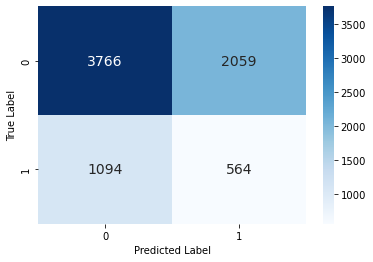

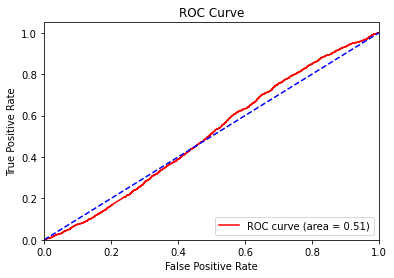

In [42]:
# performance metrics of the Model:

# Test accuracy
accuracy = accuracy_score(y_test5, y_predict_svm_baseline_model)
print ('accuracy :', accuracy)

# per metrics
print(classification_report(y_test5, y_predict_svm_baseline_model))

# Test - confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test5, y_predict_svm_baseline_model)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC Curve
y_score = svm_baseline_model.predict_proba(x_test5_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model6 - SVM_Hyperparameter optimization

In [39]:
# Training the model to find the parameters,
clf_svm_hyp = SVC(random_state=42, probability=True)

#define hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5],
              'kernel': ['rbf', 'poly', 'linear'],
              'degree': [3, 4],
              'gamma': ['scale', 0.01, 0.05, 0.1, 0.5, 1],
              'max_iter': [500]
             }

# grid search and cross validation
grid_search_hyp = GridSearchCV(clf_svm_hyp, param_grid, cv=5, n_jobs=-1)
grid_search_hyp.fit(x_train_smt5_scaled, y_train_smt5)

# print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search_hyp.best_params_}")
print(f"Best score: {grid_search_hyp.best_score_:.4f}")
results_svm_df = pd.DataFrame(grid_search_hyp.cv_results_)
results_svm_df = results_svm_df.sort_values('rank_test_score')
results_svm_df

Best hyperparameters: {'C': 0.001, 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 500}
Best score: 0.6954


C:\Users\deenu\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


NameError: name 'results' is not defined

In [44]:
results_svm_df = pd.DataFrame(grid_search_hyp.cv_results_)
results_svm_df = results_svm_df.sort_values('rank_test_score')
results_svm_df
#results_svm_df.to_excel(r'C:\Users\deenu\OneDrive\Desktop\Neural Computing\Individual Coursework\results_svm_df.xlsx', index=False)

# Model7 - SVM_final_Model with best parameters

In [1]:
# Train the model with best parameters, 

clf_svm_best = SVC(random_state=42, probability=True)

#best parameter from the arch grid search.
param_grid = {'C': [0.001],
              'kernel': ['rbf'],
              'degree': [3],
              'gamma': ['scale', 0.1],
              'max_iter': [500]
             }

# grid search and cross validation
SVM_final_best = GridSearchCV(clf_svm_best, param_grid, cv=5, n_jobs=-1)
SVM_final_best.fit(x_train_smt5_scaled, y_train_smt5)

#Test the model
y_predict_SVM_final_best = SVM_final_best.predict(x_test5_scaled)

NameError: name 'SVC' is not defined

In [ ]:
# performance metrics of the Model:

# Test accuracy
accuracy = accuracy_score(y_test5, y_predict_SVM_final_best)
print ('accuracy :', accuracy)

# per metrics
print(classification_report(y_test5, y_predict_SVM_final_best))

# Test - confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test5, y_predict_SVM_final_best)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC Curve
y_score = SVM_final_best.predict_proba(x_test5_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()